### Fractals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
def getParameters(fractalType='Mandelbrot'):
    if fractalType == 'Mandelbrot':
        x_min = -2
        x_max = 0.5
        y_min = -1.25
        y_max = 1.25
        z0 = 0j
    
    elif fractalType == 'Magnet':
        x_min = 0.9
        x_max = 1
        y_min = -0.1
        y_max = 0.1
        z0 = 0j

    elif fractalType == 'Nova':
        x_min = -2.5
        x_max = 1
        y_min = -1
        y_max = 1
        z0 = 1
        
    return (x_min, x_max, y_min, y_max), z0

In [13]:
def generateFractal_Vect(nx=1024, ny=1024, N=100, z_max=4, d_min=0.000001, fractalType='Mandelbrot', plotBool=False):
    
    start = time.time()
    
    (x_min, x_max, y_min, y_max), z0 = getParameters(fractalType)
    
    x = np.linspace(x_min, x_max, nx)
    y = np.linspace(y_min, y_max, ny)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    nrows, ncols = C.shape
    Z = np.zeros_like(X)
    z = np.zeros_like(X) + z0
    keep = np.full(X.shape, True)
    for n in range(N):
        z_old = z
        
        if fractalType == 'Mandelbrot':
            z = z ** 2 + C
            mask = (abs(z) > z_max) & keep
        elif fractalType == 'Magnet':
            z = np.sqrt((z ** 2 + C - 1) / (2 * z + C - 2) )
            mask = (abs(z-z_old) < d_min) & keep
        elif fractalType == 'Nova':
            z = z - (z**3) - 1/(3 * z**2) + C
            mask = (abs(z-z_old) < d_min) & keep
        
        Z[mask] = n
        keep[mask] = False
        
    dt = time.time() - start
    print("{} created in {} s".format(fractalType, dt))
        
    if plotBool:
        plt.figure(figsize=(10,10))
        plt.imshow(Z, cmap = 'gnuplot2')

        plt.xticks(np.linspace(0, nx, 5), np.linspace(x_min, x_max, 5));
        plt.yticks(np.linspace(0, ny, 5), np.linspace(y_min, y_max, 5));

    return X, Y, Z

<ipython-input-13-ab868a4249ba>:20: RuntimeWarning: overflow encountered in square
  z = z ** 2 + C
<ipython-input-13-ab868a4249ba>:20: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + C
<ipython-input-13-ab868a4249ba>:21: RuntimeWarning: overflow encountered in absolute
  mask = (abs(z) > z_max) & keep


Mandelbrot created in 5.759143590927124 s


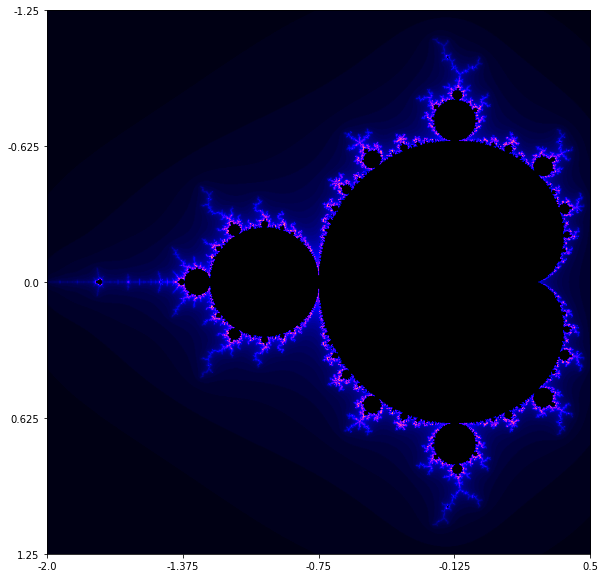

In [14]:
X, Y, fractalSet = generateFractal_Vect(fractalType='Mandelbrot', plotBool=True)

Magnet created in 25.34046196937561 s


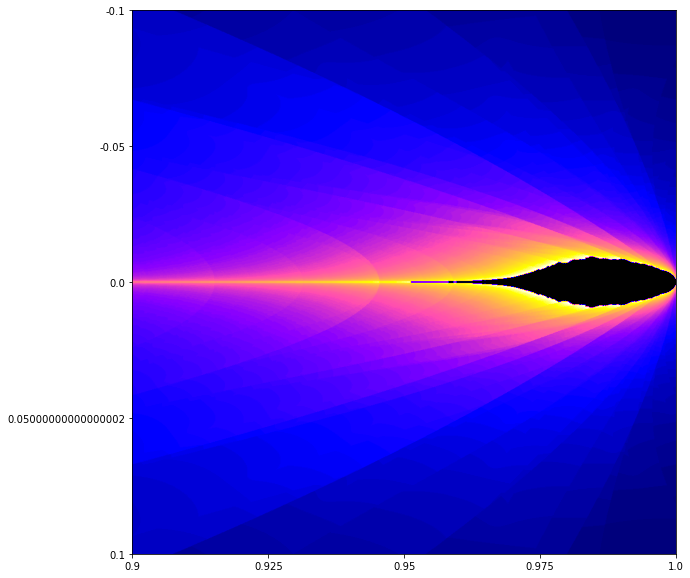

In [15]:
X, Y, fractalSet = generateFractal_Vect(fractalType='Magnet', d_min=0.000001, plotBool=True)

<ipython-input-13-ab868a4249ba>:26: RuntimeWarning: overflow encountered in power
  z = z - (z**3) - 1/(3 * z**2) + C
<ipython-input-13-ab868a4249ba>:26: RuntimeWarning: invalid value encountered in power
  z = z - (z**3) - 1/(3 * z**2) + C
<ipython-input-13-ab868a4249ba>:26: RuntimeWarning: overflow encountered in square
  z = z - (z**3) - 1/(3 * z**2) + C
<ipython-input-13-ab868a4249ba>:26: RuntimeWarning: invalid value encountered in square
  z = z - (z**3) - 1/(3 * z**2) + C
<ipython-input-13-ab868a4249ba>:26: RuntimeWarning: overflow encountered in multiply
  z = z - (z**3) - 1/(3 * z**2) + C
<ipython-input-13-ab868a4249ba>:26: RuntimeWarning: invalid value encountered in multiply
  z = z - (z**3) - 1/(3 * z**2) + C
<ipython-input-13-ab868a4249ba>:26: RuntimeWarning: overflow encountered in true_divide
  z = z - (z**3) - 1/(3 * z**2) + C
<ipython-input-13-ab868a4249ba>:26: RuntimeWarning: invalid value encountered in true_divide
  z = z - (z**3) - 1/(3 * z**2) + C
<ipython-input-1

Nova created in 17.16277027130127 s


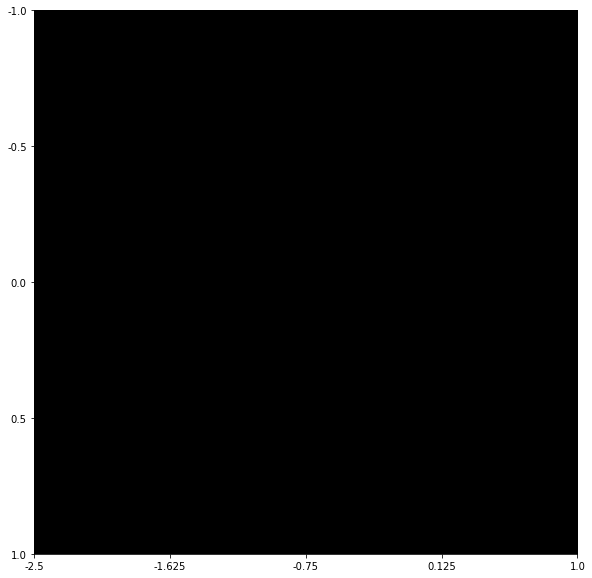

In [16]:
X, Y, fractalSet = generateFractal_Vect(fractalType='Nova', d_min=0.000001, plotBool=True)